In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
data_path = "data/AMZN.csv"

In [97]:
import DataLoader, Machine_Model, Engine, Information
import torch

train_percent = 0.95
val_percent = 0.05
test_percent = None
batch_size = 16

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     test_percent=test_percent, batch_size=batch_size)
train, val, test = dataloader.fit()

try:
    print(len(train), len(val), len(test))
except:
    print(len(train), len(val))

# INPUT_SIZE = len(train.dataset[0][0][0])  # number of features
INPUT_SIZE = len(Information.features)
HIDDEN_UNITS = 4
OUTPUT_SIZE = 1
DEPTH = 4

model0 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE,
                              depth_number=DEPTH)

EPOCHS = 40
loss_fn = torch.nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model0.parameters(), learning_rate) # weight_decay=1e-5

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS, early_stop_patience=20,
                              writer=False, resolution=1)


0.95
6516
386 19


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.094088 Accuracy -843070.1992 | validation: Loss 0.178181 Accuracy -42.1249
Epoch 2 | train: Loss 0.249380 Accuracy -6033499.0286 | validation: Loss 0.418045 Accuracy -128.7526
Epoch 3 | train: Loss 0.089428 Accuracy -1917244.4861 | validation: Loss 0.132720 Accuracy -31.6090
Epoch 4 | train: Loss 0.043371 Accuracy -625802.6841 | validation: Loss 0.083200 Accuracy -29.4524
Epoch 5 | train: Loss 0.038811 Accuracy -463761.8319 | validation: Loss 0.072020 Accuracy -35.3107
Epoch 6 | train: Loss 0.039334 Accuracy -637277.3717 | validation: Loss 0.064175 Accuracy -41.3300
Epoch 7 | train: Loss 0.031673 Accuracy -589926.1735 | validation: Loss 0.069323 Accuracy -61.2939
Epoch 8 | train: Loss 0.029794 Accuracy -702796.5956 | validation: Loss 0.101513 Accuracy -96.0708
Epoch 9 | train: Loss 0.029083 Accuracy -782747.9185 | validation: Loss 0.095382 Accuracy -77.3464
Epoch 10 | train: Loss 0.026015 Accuracy -905073.3492 | validation: Loss 0.122868 Accuracy -93.5096
Epoch 

In [98]:
train.dataset[0]

(tensor([[-0.9997],
         [-0.9998],
         [-0.9998],
         [-0.9999],
         [-1.0000],
         [-1.0000],
         [-0.9999]]),
 tensor([-0.9999]))

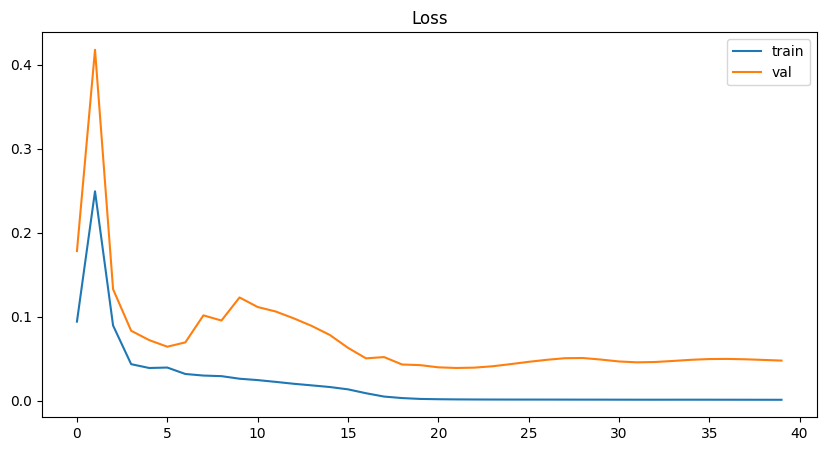

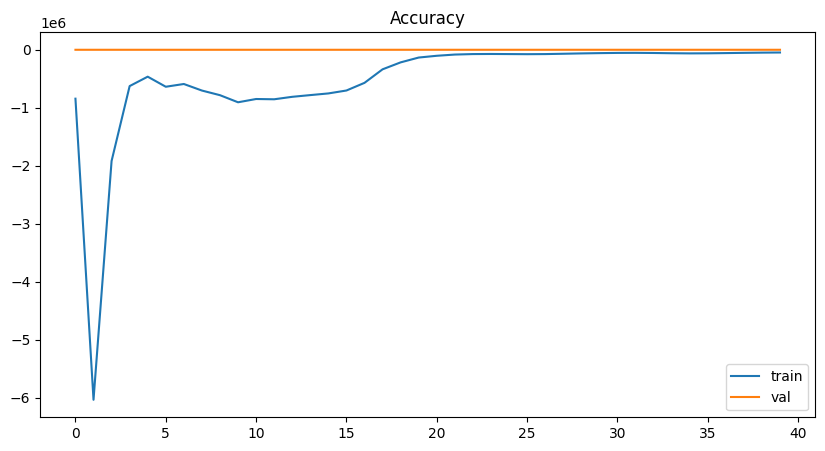

In [99]:
engine.plot_loss()
engine.plot_acc()

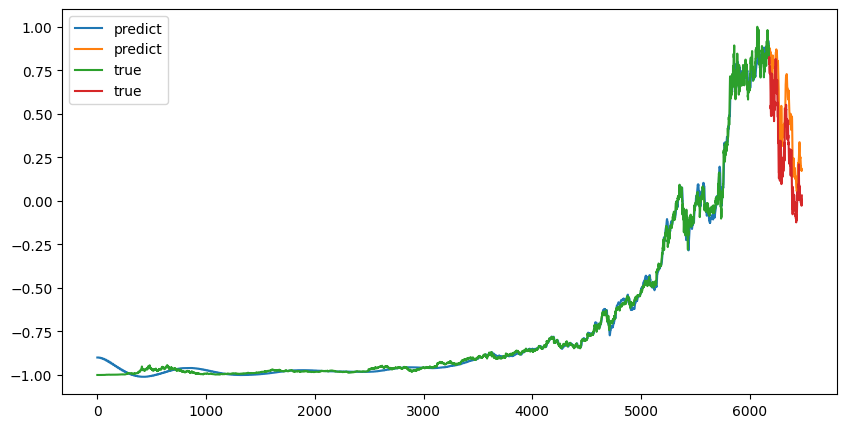

In [100]:
engine.plot_predict_real()

In [93]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


TypeError: object of type 'NoneType' has no len()

In [ ]:
engine.save()

In [104]:
%load_ext tensorboard
%tensorboard --logdir=runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
